In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 10.9 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

In [3]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

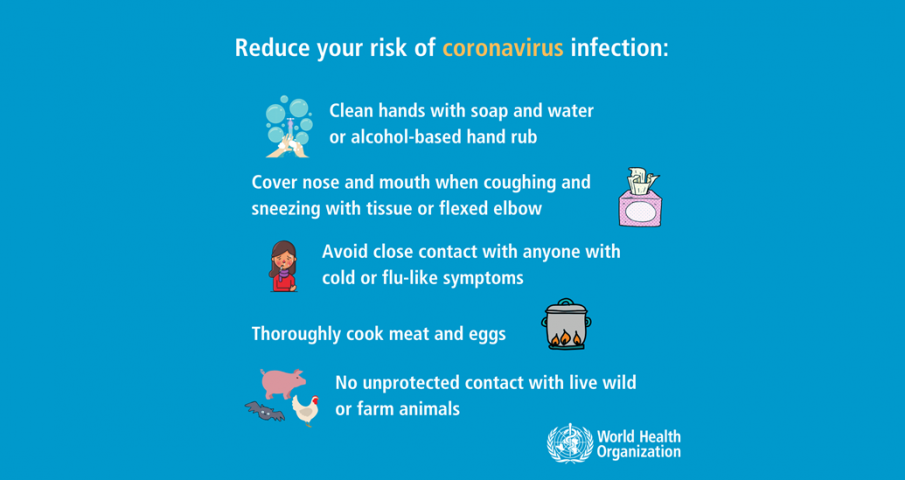

In [17]:
Image("/content/english.png")

In [18]:
output = reader.readtext('/content/english.png')

In [19]:
output

[([[231, 32], [674, 32], [674, 64], [231, 64]],
  'Reduce your risk of coronavirus infection:',
  0.8413228802088722),
 ([[326, 98], [598, 98], [598, 124], [326, 124]],
  'Clean hands with soap and water',
  0.9633980938986636),
 ([[328, 124], [542, 124], [542, 148], [328, 148]],
  'or alcohol-based hand rub',
  0.8904728229625667),
 ([[246, 169], [595, 169], [595, 196], [246, 196]],
  'Cover nose and mouth when coughing and',
  0.999377406058871),
 ([[245, 194], [546, 194], [546, 222], [245, 222]],
  'sneezing with tissue or flexed elbow',
  0.9558614016989373),
 ([[320, 240], [624, 240], [624, 266], [320, 266]],
  'Avoid close contact with anyone with',
  0.8602266147493457),
 ([[318, 266], [528, 266], [528, 292], [318, 292]],
  'cold or flu-like symptoms',
  0.7663834825124685),
 ([[248, 322], [510, 322], [510, 348], [248, 348]],
  'Thoroughly cook meat and eggs',
  0.7159736101752386),
 ([[332, 370], [640, 370], [640, 396], [332, 396]],
  'No unprotected contact with live wild',
  

In [13]:
cord = output[-1][0]

In [14]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [15]:
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

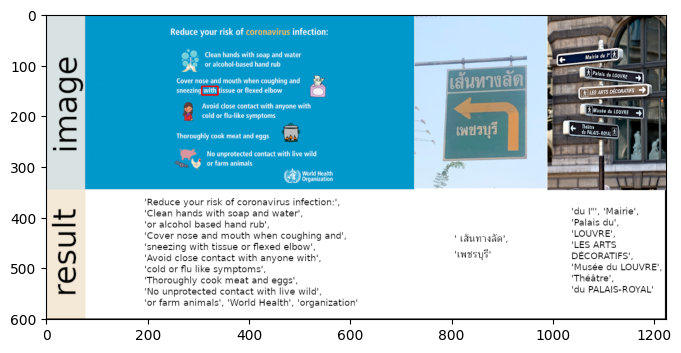

In [16]:
image = cv2.imread('/content/example.png')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))